<a href="https://colab.research.google.com/github/cfreeman22/d212_data_mining_2/blob/main/D212_task2_PCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA Mining 2 TASK 2 PCA Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

# standardize the data with robust scaler
from sklearn.preprocessing import RobustScaler

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the data from my google drive.
df = pd.read_csv('/content/drive/My Drive/churn_clean.csv')

## Data Preeparation steps

In [4]:

# renaming the survey items columns
df = df.rename(columns={'Item1': 'TimelyResponse','Item2': 'TimelyFixes' , 'Item3': 'TimelyReplacements', 'Item4': 'Reliability',

                          'Item5': 'Options', 'Item6': 'RespectfulResponse', 'Item7': 'CourteousExchange', 'Item8': 'ActiveListening'})


In [5]:
# select all columns except float based
df2 = df.select_dtypes(exclude ='object')

# Dropping some cloums
cols_to_drop = ['CaseOrder','Zip', 'Lat','Lng', 'Bandwidth_GB_Year'] #,'Population']#,'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']

df2 = df2.drop(cols_to_drop, axis = 1)
df2.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,5,5,5,3,4,4,3,4
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,3,4,3,3,4,3,4,4
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,4,4,2,4,4,3,3,3
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,4,4,4,2,5,4,3,3
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,4,4,4,3,4,4,4,5


## Standardize the data and save clean data

In [6]:

robust_scaler = RobustScaler()

# calculate median and IQR  
robust_scaler.fit(df2)

# scale all data points using median and IQR
robust_scaled_data = robust_scaler.transform(df2)

In [7]:
print(len(robust_scaled_data))

10000


In [8]:
pca_df = pd.DataFrame(robust_scaled_data, columns = df2.columns)

# standardized data 
#pca_df.to_csv('pca_df.csv')

## Matrix of the all the prrincipal components

In [9]:
#
pca = PCA(n_components = pca_df.shape[1])
pca.fit_transform(pca_df)

array([[ 1.98215924,  1.75010496, -0.81236296, ...,  0.25687822,
        -0.68839439,  0.28186362],
       [-0.2414998 ,  0.37370986,  0.04477887, ..., -1.03304738,
        -0.71122576,  0.33598432],
       [-0.69576178,  0.12248763, -0.5085876 , ..., -0.00904535,
        -0.62105161,  0.09610197],
       ...,
       [ 1.49087588,  0.03336766, -0.73749175, ..., -0.19429854,
        -0.31579287, -0.43177099],
       [ 2.08534681,  0.20862068,  2.0669093 , ..., -0.46460911,
         0.35059161, -0.6106088 ],
       [-2.32352122, -0.65636863,  0.18016794, ..., -0.65526029,
         0.25363303, -0.52398565]])

In [10]:
matrix_all = pd.DataFrame(pca.components_.T,
                    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                             'PC10', 'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16',
                             'PC17', 'PC18'],
                    index=pca_df.columns)
matrix_all


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Population,-0.002810,0.029756,0.998600,-0.028249,0.016579,0.009560,-0.013588,-0.013756,-0.014190,-0.004675,0.007038,-0.000767,0.005726,0.002190,-0.000170,-0.007045,-0.000802,-0.002366
Children,0.002403,0.010924,-0.006568,-0.011005,0.021323,0.026023,0.031983,0.083514,-0.033694,-0.059841,0.709460,0.580337,0.373823,-0.025158,-0.025910,0.063501,0.024561,0.007540
Age,0.002651,-0.007435,0.007441,0.010653,-0.002983,-0.004308,0.000950,-0.017394,0.012625,0.007267,-0.034679,-0.059008,-0.010814,0.037291,-0.297105,0.948537,-0.065531,0.027294
Income,0.000776,0.013155,-0.013766,0.017032,0.369032,0.924296,-0.035235,0.063597,0.015784,0.034783,-0.036254,-0.013541,-0.000349,-0.003650,0.021554,0.010689,-0.001861,0.000198
Outage_sec_perweek,-0.010270,-0.005510,0.006946,0.054621,-0.036313,-0.035947,0.058512,0.501543,-0.557174,0.609719,-0.140411,0.175455,-0.069982,-0.001860,0.027557,0.023482,-0.018023,-0.004032
Email,0.005003,-0.002406,0.020331,-0.037838,0.006884,-0.058719,0.094333,0.619923,0.741447,0.189476,0.067873,-0.073778,-0.056856,0.047030,-0.001754,-0.004479,0.004103,-0.015703
Contacts,-0.002972,-0.002052,0.002084,-0.005919,0.009715,-0.003907,0.002622,-0.002248,-0.004601,0.029915,-0.007731,-0.026298,-0.016539,-0.009835,-0.006233,0.044916,0.891932,0.447426
Yearly_equip_failure,-0.003460,0.003301,-0.003863,-0.003920,-0.000483,0.013045,0.013799,-0.027259,-0.040848,-0.006088,0.027539,0.025530,-0.023187,0.983863,-0.141070,-0.081018,0.000799,0.027173
Tenure,-0.002603,0.007496,-0.002433,-0.008393,0.004366,0.000197,-0.011609,-0.017240,-0.008545,0.012007,-0.011539,0.005816,-0.002004,0.019949,-0.049404,0.039997,0.445049,-0.892476
MonthlyCharge,0.000839,-0.001019,-0.004187,0.008400,-0.018368,-0.004612,0.039153,0.067904,-0.088610,0.118491,0.024389,-0.554021,0.813139,0.024057,-0.032133,-0.033909,-0.000934,-0.004968


## Selecting Principal Components Using the elbow rule And the Kaiser criterion.

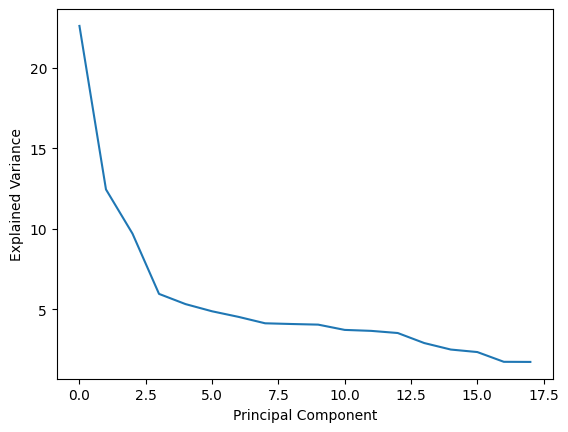

In [11]:
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [12]:
eigenvalues = pca.explained_variance_
mean_eigenvalue = np.mean(eigenvalues)
num_components = sum(eigenvalues > mean_eigenvalue)
print(f'Total number of principal components: {num_components}')


Total number of principal components: 4


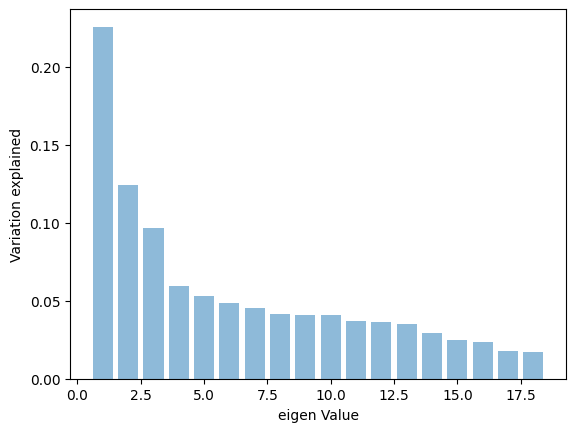

In [13]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

## The variance of each of the principal components
### Elbow Rule

In [14]:
best_var_elbow = [i * 100 for i in list(pca.explained_variance_ratio_)][0:3]
elbow_var = pd.DataFrame(zip(range(1,4), best_var_elbow)).rename(columns={0:'Principal Component', 
                                                       1:'Percentage of Variance Explained'}).set_index('Principal Component')
elbow_var 

,Percentage of Variance Explained
Principal Component,
1,22.591957
2,12.448416
3,9.705085


#### Total variance

In [15]:
elbow_var.sum()

Percentage of Variance Explained    44.745458
dtype: float64

### Eigenvalues

In [16]:
best_var_eigen = [i * 100 for i in list(pca.explained_variance_ratio_)][0:4]
eigen_var = pd.DataFrame(zip(range(1,5), best_var_eigen)).rename(columns={0:'Principal Component', 
                                                       1:'Percentage of Variance Explained'}).set_index('Principal Component')
eigen_var 

,Percentage of Variance Explained
Principal Component,
1,22.591957
2,12.448416
3,9.705085
4,5.966506


#### Total Variance

In [17]:
eigen_var.sum()

Percentage of Variance Explained    50.711964
dtype: float64